# Using Gradient descent 
## => preparation steps 
        1 - Tools preparation (numpy , matplotlib, pandas) 
        2 - Dataset preparation and get m 
## =>  Implement  Gradient descent  need 3 functions 
   ### -- Cost function 
        - for compute error 
   ### -- Compute_ gradient 
        - for compute partial derevatives of J(w,b)
   ### -- Gradient descent algorithm 
        - Update w , b
 

# Notes
## 1- Here simultaniously means that you calculate the partial derivatives for all the parameters before updating any of the parameters

In [244]:
# step 1 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [296]:
house_data = pd.read_csv("house data_one variable.csv")
house_data.columns , house_data.head(10)

(Index(['SqFt', 'Price'], dtype='object'),
    SqFt   Price
 0  1790  114300
 1  2030  114200
 2  1740  114800
 3  1980   94700
 4  2130  119800
 5  1780  114600
 6  1830  151600
 7  2160  150700
 8  2110  119200
 9  1730  104000)

In [297]:
x_train = np.array(house_data['SqFt'])
y_train = np.array(house_data['Price'])

In [298]:
# # step 2
# # describe house price (y *1000) $ using size (x * 1000) feet square
# x_train = np.array([1, 2, 1.2, 1.5, 3, 4.5, 2.3, 3.5])
# y_train = np.array([300, 500, 290, 370, 600, 950, 530, 420])

In [299]:
x_train.shape

(128,)

In [249]:
# get sample size m
m = x_train.shape[0]
m

128

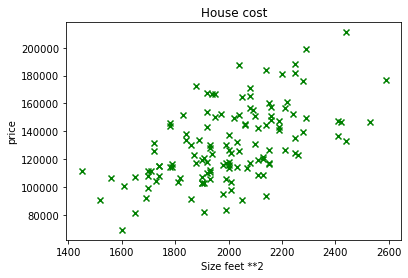

In [268]:
plt.scatter(x_train, y_train, marker='x', c='g')
plt.title("House cost")
plt.xlabel("Size feet **2 ")
plt.ylabel("price")
plt.show()

## y = w * x + b


## Cost function 
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [269]:
# Cost function 
def compute_cost(x, y, w, b):
    cost = 0
    for i in range(m):
        f_wd = w * x[i] + b  # compute f_wb(y_hat) prediction value
        cost += (f_wd - y[i])**2
        
    return  cost / (2 * m ) 
    
    

In [252]:
compute_cost(x_train, y_train, 150, 150) 

14816714687.5

In lecture, *gradient descent* was described as

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$



# Compute gradient  dj_dw, dj_db

## Impotrant Note
Update w, b simultaniously =>  means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [253]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wd = w * x[i] + b
        dj_dw += (f_wd - y[i]) * x[i]
        dj_db += (f_wd - y[i]) 
        
    dj_dw += dj_dw / m
    dj_db += dj_db / m
        
    
    return dj_dw, dj_db   
    

# Gradient descent

In [254]:
def gradient_descent(x, y, w_intial, b_intial, alpha,num_itrerations, compute_cost, compute_gradient):
    
    j_history = []
    w = w_intial
    b = b_intial

    for g in range(num_itrerations + 1):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    
        # View test points
        j_history.append(compute_cost(x, y, w, b))
    
        if g % 500 == 0:
            print(f"Iteration: {g:4}, Cost: {j_history[-1]: .2e}, dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}, w: {w: 0.3e}, b:{b: 0.5e}")
    
    
    return w, b   
    
    

In [281]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 4000
tmp_alpha = .000000001

finil_w, finil_b = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"final w = {finil_w}, final b = {finil_b}")

Iteration:    0, Cost:  2.22e+09, dj_dw: -3.407e+10, dj_db: -1.683e+07, w:  3.407e+01, b: 1.68251e-02
Iteration:  500, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b: 2.50910e-02
Iteration: 1000, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b: 1.79501e-02
Iteration: 1500, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b: 1.08092e-02
Iteration: 2000, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b: 3.66828e-03
Iteration: 2500, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b:-3.47263e-03
Iteration: 3000, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b:-1.06135e-02
Iteration: 3500, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b:-1.77544e-02
Iteration: 4000, Cost:  2.49e+08, dj_dw: -7.059e+00, dj_db:  1.428e+04, w:  6.524e+01, b:-2.48953e-02
final w = 65.23845950456253, final b = -0.02489530747878169


## Results show that we arrive to minimum cost  at iteration 500 so we can set # iterations = 700 for example

In [280]:
cost = compute_cost(x_train, y_train, finil_w,finil_b)
cost

249186925.58218935

In [283]:
def linear_result(x, w, b):
    y_hat = np.zeros(len(x))
    for i in range(len(x)):
        y_hat[i] = w * x[i] + b
    return y_hat

In [294]:
prediction_y = linear_result(x_train, finil_w, finil_b)

for i in range(4):
    print(f"prediction value is {prediction_y[i] / 1000:.2f}K, actual value is {y_train[i]/ 1000}k")


prediction value is 116.78K, actual value is 114.3k
prediction value is 132.43K, actual value is 114.2k
prediction value is 113.51K, actual value is 114.8k
prediction value is 129.17K, actual value is 94.7k


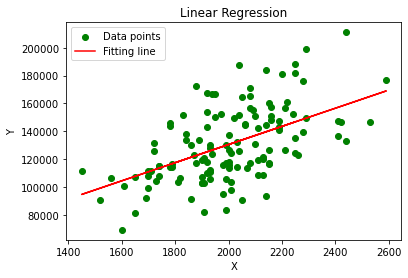

In [285]:
plt.scatter(x_train, y_train, color='g', label='Data points')

plt.plot(x_train, prediction_y, color='red', label='Fitting line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Test and tray

In [277]:
house_data.head(10)

,SqFt,Price
0,1790,114300
1,2030,114200
2,1740,114800
3,1980,94700
4,2130,119800
5,1780,114600
6,1830,151600
7,2160,150700
8,2110,119200
9,1730,104000


In [295]:
size  = 2100
predicted_price =  size * finil_w + finil_b

print(f"Predicted price of house size: {size} feets square is {predicted_price / 1000:.2f}k")

Predicted price of house size: 2100 feets square is 137.00k
